In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sn
from sqlalchemy import create_engine

import scipy.stats as st
from scipy.stats import linregress

# Concrete Data

In [8]:
file1 = "Resources/Concrete_Data.csv"

In [9]:
concrete = pd.read_csv(file1)
print(len(concrete))
concrete.head(10)

1030


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [10]:
concrete = concrete.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "Cement_kg_in_a_Cubic_Meter_Mixture", "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture", "Fly Ash (component 3)(kg in a m^3 mixture)": "Fly_Ash_kg_in_a_Cubic_Meter_Mixture", "Water  (component 4)(kg in a m^3 mixture)": "Water_kg_in_a_Cubic_Meter_Mixture", "Superplasticizer (component 5)(kg in a m^3 mixture)": "Superplasticizer_kg_in_a_Cubic_Meter_Mixture", "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture", "Fine Aggregate (component 7)(kg in a m^3 mixture)": "Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture", "Age (day)": "Age_in_Days", "Concrete compressive strength(MPa, megapascals) ": "Concrete_Compressive_Strength"})
concrete.head()

,Cement_kg_in_a_Cubic_Meter_Mixture,Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,Fly_Ash_kg_in_a_Cubic_Meter_Mixture,Water_kg_in_a_Cubic_Meter_Mixture,Superplasticizer_kg_in_a_Cubic_Meter_Mixture,Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture,Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,Age_in_Days,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
concrete.describe()

,Cement_kg_in_a_Cubic_Meter_Mixture,Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,Fly_Ash_kg_in_a_Cubic_Meter_Mixture,Water_kg_in_a_Cubic_Meter_Mixture,Superplasticizer_kg_in_a_Cubic_Meter_Mixture,Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture,Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,Age_in_Days,Concrete_Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
X = concrete.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
y = concrete.iloc[:,8]
print(X.shape, y.shape)

(1030, 8) (1030,)


In [13]:
X.head()

,Cement_kg_in_a_Cubic_Meter_Mixture,Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,Fly_Ash_kg_in_a_Cubic_Meter_Mixture,Water_kg_in_a_Cubic_Meter_Mixture,Superplasticizer_kg_in_a_Cubic_Meter_Mixture,Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture,Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,Age_in_Days
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# y_scaler = MinMaxScaler().fit([y_train])
# y_train_scaled = y_scaler.transform([y_train])
# y_test_scaled = y_scaler.transform([y_test])

In [16]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier

RandomForestRegressor()

In [17]:
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.985416982976014
Testing Data Score: 0.8902058693792999


In [18]:
classifier.feature_importances_

array([0.33883376, 0.07417579, 0.0183353 , 0.11644639, 0.06464448,
       0.02699598, 0.03643974, 0.32412856])

In [19]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators': [100, 1000],
#               'criterion': ['mse', 'mae']}
# grid = GridSearchCV(classifier, param_grid, verbose=3)

In [20]:
# grid.fit(X_train_scaled, y_train)

In [21]:
# print(grid.best_params_)

In [22]:
# predictions = grid.predict(X_test_scaled)

In [23]:
# print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

In [24]:
# import joblib
# filename = 'concrete.sav'
# joblib.dump(classifier, filename)

In [25]:
concrete.corr()

,Cement_kg_in_a_Cubic_Meter_Mixture,Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,Fly_Ash_kg_in_a_Cubic_Meter_Mixture,Water_kg_in_a_Cubic_Meter_Mixture,Superplasticizer_kg_in_a_Cubic_Meter_Mixture,Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture,Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,Age_in_Days,Concrete_Compressive_Strength
Cement_kg_in_a_Cubic_Meter_Mixture,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_Ash_kg_in_a_Cubic_Meter_Mixture,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water_kg_in_a_Cubic_Meter_Mixture,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer_kg_in_a_Cubic_Meter_Mixture,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age_in_Days,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete_Compressive_Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<IPython.core.display.Javascript object>


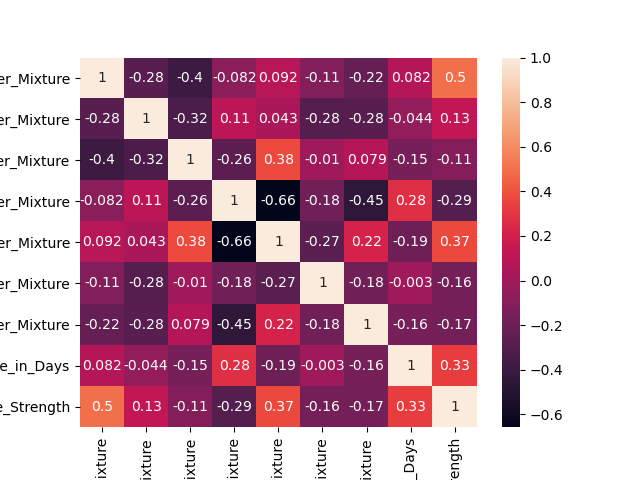

In [26]:
corr = concrete.corr()
# print(corrMatrix)
sn.heatmap(corr, annot=True)
# figure size in inches

plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.609907286822649
Testing Score: 0.6249829353885574


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()
model.add(Dense(units=170, activation='relu', input_dim=8))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

In [31]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [32]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=150,
    shuffle=True,
    verbose=2
)

Epoch 1/150
25/25 - 1s - loss: 1186.2853 - mae: 29.8183
Epoch 2/150
25/25 - 0s - loss: 339.4633 - mae: 14.2122
Epoch 3/150
25/25 - 0s - loss: 219.2862 - mae: 12.0098
Epoch 4/150
25/25 - 0s - loss: 192.3114 - mae: 11.3628
Epoch 5/150
25/25 - 0s - loss: 178.5658 - mae: 10.8131
Epoch 6/150
25/25 - 0s - loss: 164.8630 - mae: 10.4470
Epoch 7/150
25/25 - 0s - loss: 154.0310 - mae: 10.0524
Epoch 8/150
25/25 - 0s - loss: 145.5601 - mae: 9.7541
Epoch 9/150
25/25 - 0s - loss: 135.7187 - mae: 9.4155
Epoch 10/150
25/25 - 0s - loss: 127.1305 - mae: 9.0996
Epoch 11/150
25/25 - 0s - loss: 117.4515 - mae: 8.6595
Epoch 12/150
25/25 - 0s - loss: 109.7126 - mae: 8.3320
Epoch 13/150
25/25 - 0s - loss: 101.2105 - mae: 7.8898
Epoch 14/150
25/25 - 0s - loss: 91.7073 - mae: 7.4765
Epoch 15/150
25/25 - 0s - loss: 85.5803 - mae: 7.1457
Epoch 16/150
25/25 - 0s - loss: 77.9668 - mae: 6.7855
Epoch 17/150
25/25 - 0s - loss: 72.4268 - mae: 6.5693
Epoch 18/150
25/25 - 0s - loss: 67.4209 - mae: 6.1868
Epoch 19/150
25/

In [33]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 35.6866 - mae: 4.4818
Normal Neural Network - Loss: 35.686649322509766, Accuracy: 4.481845378875732


In [34]:
con = model.predict(X_test_scaled)
print(con)

[[54.580265 ]
 [40.21206  ]
 [71.40085  ]
 [33.99647  ]
 [17.10235  ]
 [50.361607 ]
 [33.652412 ]
 [54.23551  ]
 [34.97337  ]
 [47.266018 ]
 [41.837677 ]
 [12.1361885]
 [52.851925 ]
 [43.196617 ]
 [34.881035 ]
 [26.836777 ]
 [39.127644 ]
 [20.575716 ]
 [39.708824 ]
 [35.10203  ]
 [37.630085 ]
 [40.808575 ]
 [47.5937   ]
 [15.4473   ]
 [31.659328 ]
 [40.15687  ]
 [12.6926155]
 [52.88261  ]
 [57.859978 ]
 [16.781593 ]
 [43.700153 ]
 [38.06957  ]
 [52.31207  ]
 [60.230923 ]
 [23.124922 ]
 [41.267754 ]
 [33.783134 ]
 [47.144936 ]
 [13.909831 ]
 [54.677097 ]
 [17.240496 ]
 [ 9.623626 ]
 [39.937874 ]
 [48.16334  ]
 [15.416776 ]
 [75.849754 ]
 [49.753872 ]
 [37.349903 ]
 [27.788202 ]
 [12.036183 ]
 [54.459225 ]
 [48.32419  ]
 [39.154026 ]
 [17.820671 ]
 [43.839294 ]
 [36.549213 ]
 [26.646807 ]
 [14.09854  ]
 [38.388462 ]
 [21.040041 ]
 [47.28861  ]
 [17.395056 ]
 [39.557003 ]
 [43.85967  ]
 [35.111427 ]
 [21.86614  ]
 [40.150093 ]
 [17.46063  ]
 [33.155666 ]
 [27.13218  ]
 [13.061878 ]
 [29.6

In [35]:
print(y_test)

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
440    24.85
346    40.15
254    13.54
694    32.88
344    17.57
Name: Concrete_Compressive_Strength, Length: 258, dtype: float64


In [36]:
model.save("maeConcrete.h5")

In [37]:
import joblib
filename2 = 'concrete2.sav'
joblib.dump(X_scaler, filename2)

['concrete2.sav']